# Projekt 1 (temat 1) - kamien milowy 2

## Autorzy: Jan Skwarek, Daniel Tytkowski

## Wstępna analiza

Wczytajmy najpierw niezbędne biblioteki i pakiety.

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

Zacznijmy od załadowania ramki danych i podziału zbioru na zbiór do budowy i walidacyjny.

In [379]:
!wget https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
df_raw = pd.read_csv('census_income_dataset.csv')
df = df_raw.sample(frac=0.7, random_state=500)
df_test = df_raw.drop(df.index) 

--2022-03-30 11:16:45--  https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/census_income_dataset.csv
Resolving lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)... 52.216.110.211
Connecting to lovespreadsheet-tutorials.s3.amazonaws.com (lovespreadsheet-tutorials.s3.amazonaws.com)|52.216.110.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5717107 (5,5M) [text/csv]
Saving to: ‘census_income_dataset.csv.4’

census_income_datas 100%[===================>]   5,45M  1,16MB/s    in 13s     

2022-03-30 11:17:00 (417 KB/s) - ‘census_income_dataset.csv.4’ saved [5717107/5717107]



Pierwsze spojrzenie na dane.

In [380]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
24423,55,State-gov,111130.0,Assoc-acdm,12,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,<=50K
33032,28,State-gov,293628.0,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,10.0,?,<=50K
18740,44,Self-emp-inc,37997.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
41130,36,Private,238342.0,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
29271,35,Private,217274.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14407,36,Local-gov,192337.0,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
42152,17,Private,313444.0,12th,8,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
42171,25,Private,318644.0,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
23118,21,State-gov,145651.0,Some-college,10,Never-married,Sales,Own-child,Black,Female,0.0,1602.0,12.0,United-States,<=50K


In [381]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
24423,55,State-gov,111130.0,Assoc-acdm,12,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,<=50K
33032,28,State-gov,293628.0,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,10.0,?,<=50K
18740,44,Self-emp-inc,37997.0,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K
41130,36,Private,238342.0,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
29271,35,Private,217274.0,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K


Poszukajmy braków danych.

In [382]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

Nie oznacza to jednak, że tych braków nie ma.

In [383]:
print(df.loc[df.workclass == "?"].__len__())
print(df.loc[df.occupation == "?"].__len__())
print(df.loc[df.native_country == "?"].__len__())

1951
1960
610


Braki danych jednak się pojawiają.

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34189 entries, 24423 to 19179
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34189 non-null  int64  
 1   workclass       34189 non-null  object 
 2   fnlwgt          34189 non-null  float64
 3   education       34189 non-null  object 
 4   education_num   34189 non-null  int64  
 5   marital_status  34189 non-null  object 
 6   occupation      34189 non-null  object 
 7   relationship    34189 non-null  object 
 8   race            34189 non-null  object 
 9   sex             34189 non-null  object 
 10  capital_gain    34189 non-null  float64
 11  capital_loss    34189 non-null  float64
 12  hours_per_week  34189 non-null  float64
 13  native_country  34189 non-null  object 
 14  income_level    34189 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 4.2+ MB


In [385]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,34189.000000,3.418900e+04,34189.000000,34189.000000,34189.000000,34189.000000
mean,38.697447,1.893457e+05,10.087133,1101.266226,86.045833,40.430138
std,13.713151,1.057617e+05,2.568424,7601.004015,400.627974,12.412465
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780540e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.372720e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [386]:
dfInfo = pd.read_csv('attributes_census_income.csv')
dfInfo

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-in..."
2,fnlwgt,float,Final sampling weight. Inverse of sampling fra...
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad..."
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-ma..."
6,occupation,string,"Values: Tech-support, Craft-repair, Other-serv..."
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-famil..."
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian..."
9,sex,string,"Values: Female, Male"


In [387]:
df.nunique()

age                  73
workclass             9
fnlwgt            22408
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         96
hours_per_week       94
native_country       42
income_level          2
dtype: int64

Wstępne histogramy, żeby zobaczyć rozkłady.

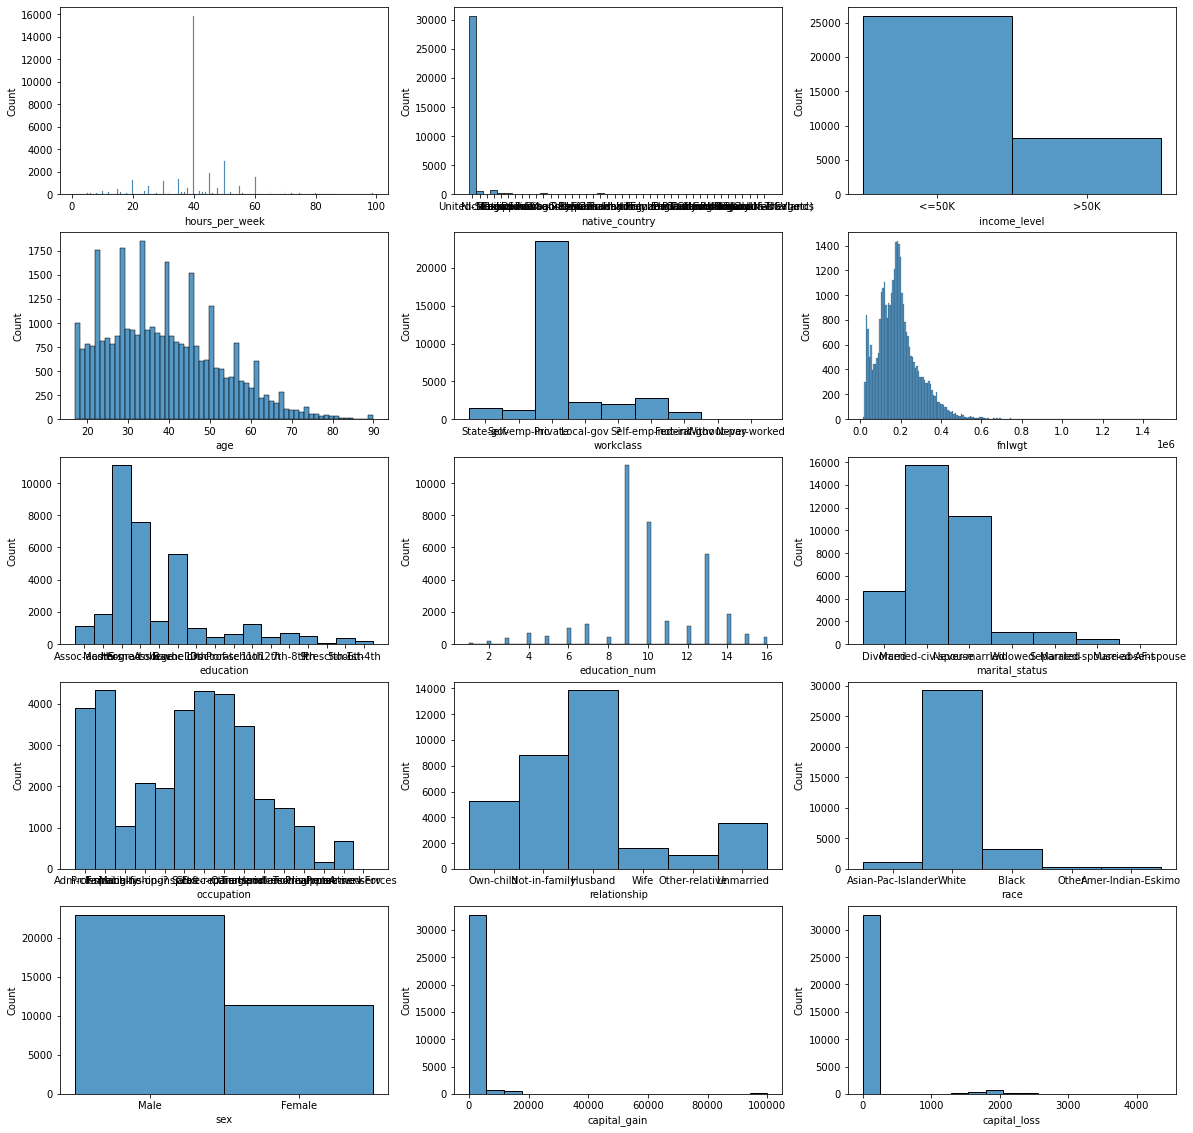

In [388]:
fig, axs = plt.subplots(nrows=5,ncols=3, figsize= (20,20))
for i in range(5):
    for j in range(3):
        sns.histplot(df, x=df.columns[(i-1)*3 + j], ax=axs[i,j])

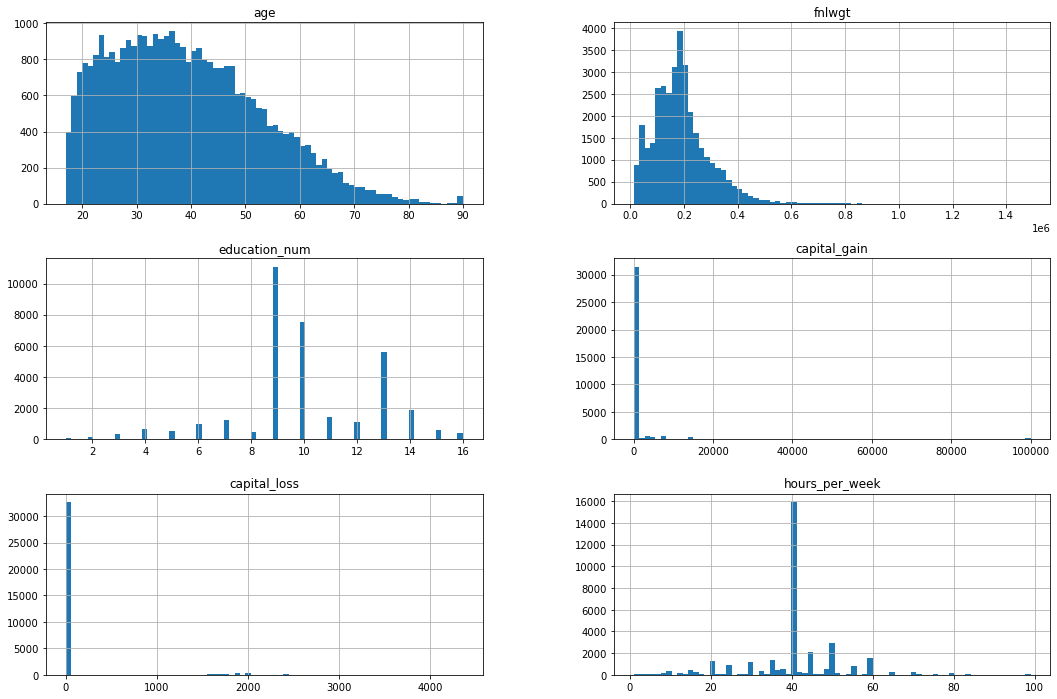

In [389]:
df.hist(bins = 73, figsize=(18, 12))
plt.show()

## Analiza jednowymiarowa

### age




In [390]:
df['age'].value_counts()

36    957
33    942
30    937
23    935
31    931
     ... 
84      6
88      5
85      2
87      1
89      1
Name: age, Length: 73, dtype: int64

In [391]:
df['age'].value_counts().size

73

In [392]:
df['age'].describe()

count    34189.000000
mean        38.697447
std         13.713151
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

Sprawdźmy jak wygląda boxplot.

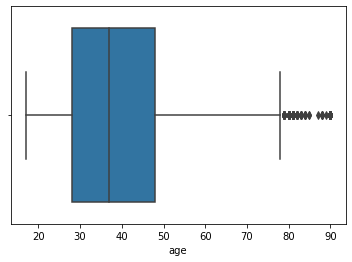

In [393]:
sns.boxplot(df['age'])
plt.show()

In [394]:
IQR = 48 - 28
print(28 - IQR * 1.5)
print(48 + IQR * 1.5)

-2.0
78.0


In [395]:
(df['age']>78).sum()

147

Zobaczmy histogram.

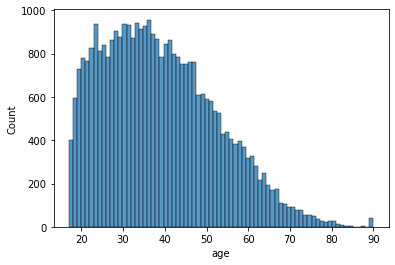

In [396]:
sns.histplot(df['age'], bins = 74)
plt.show()

Widać jednak, że nie ma tu outlayerów.

### workclass

In [397]:
df['workclass'].value_counts()

Private             23621
Self-emp-not-inc     2748
Local-gov            2237
?                    1951
State-gov            1419
Self-emp-inc         1201
Federal-gov           987
Without-pay            16
Never-worked            9
Name: workclass, dtype: int64

Pojawiają się tutaj braki danych w postaci znaków zapytania.

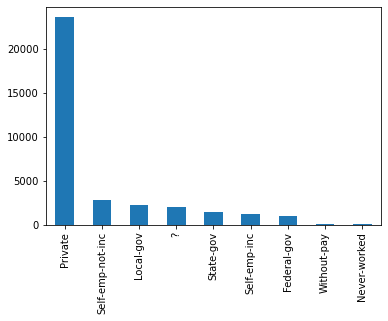

In [398]:
df['workclass'].value_counts().plot(kind="bar")
plt.show()

In [399]:
df.loc[df.workclass == "?"].__len__()

1951

### fnlwgt

In [400]:
df['fnlwgt'].value_counts()

203488.0    17
120277.0    17
190290.0    14
97723.0     12
120131.0    12
            ..
256909.0     1
223464.0     1
301108.0     1
604506.0     1
340588.0     1
Name: fnlwgt, Length: 22408, dtype: int64

In [401]:
df['fnlwgt'].value_counts().size

22408

In [402]:
df['fnlwgt'].describe()

count    3.418900e+04
mean     1.893457e+05
std      1.057617e+05
min      1.228500e+04
25%      1.175280e+05
50%      1.780540e+05
75%      2.372720e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

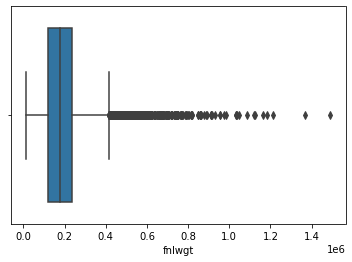

In [403]:
sns.boxplot(df['fnlwgt'])
plt.show()

In [404]:
IQR = 2.372720e+05 - 1.175280e+05
print(1.175280e+05 - IQR * 1.5)
print(2.372720e+05 + IQR * 1.5)

-62088.0
416888.0


In [405]:
(df['fnlwgt']>416888).sum()

1026

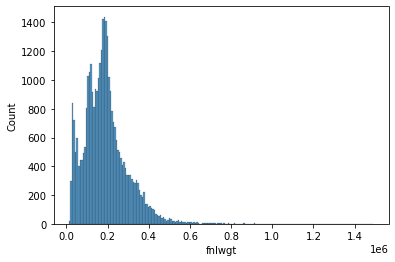

In [406]:
sns.histplot(df['fnlwgt'])
plt.show()

### education

In [407]:
df['education'].value_counts()

HS-grad         11092
Some-college     7567
Bachelors        5615
Masters          1872
Assoc-voc        1445
11th             1257
Assoc-acdm       1120
10th              970
7th-8th           663
Prof-school       597
9th               528
12th              466
Doctorate         425
5th-6th           352
1st-4th           163
Preschool          57
Name: education, dtype: int64

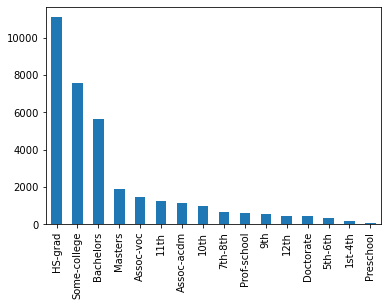

In [408]:
df['education'].value_counts().plot(kind="bar")
plt.show()

### education_num

In [409]:
df['education_num'].value_counts()

9     11092
10     7567
13     5615
14     1872
11     1445
7      1257
12     1120
6       970
4       663
15      597
5       528
8       466
16      425
3       352
2       163
1        57
Name: education_num, dtype: int64

In [410]:
df['education_num'].value_counts().size

16

In [411]:
df['education_num'].describe()

count    34189.000000
mean        10.087133
std          2.568424
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64

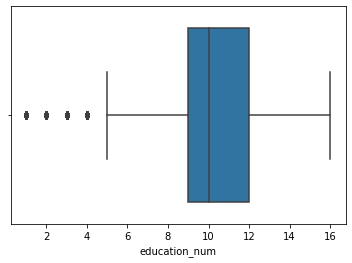

In [412]:
sns.boxplot(df['education_num'])
plt.show()

In [413]:
IQR = 12 - 9
print(9 - IQR * 1.5)
print(12 + IQR * 1.5)

4.5
16.5


In [414]:
(df['education_num']<4.5).sum()

1235

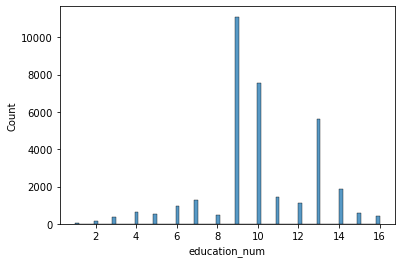

In [415]:
sns.histplot(df['education_num'])
plt.show()

Zmienna może mieć korelację '1' z 'education' i być jedynie numerycznym odpowiednikiem tamtej zmiennej.

### marital_status

In [416]:
df['marital_status'].value_counts()

Married-civ-spouse       15705
Never-married            11225
Divorced                  4672
Separated                 1075
Widowed                   1054
Married-spouse-absent      432
Married-AF-spouse           26
Name: marital_status, dtype: int64

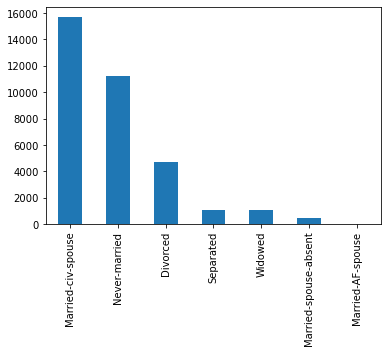

In [417]:
df['marital_status'].value_counts().plot(kind="bar")
plt.show()

### occupation

In [418]:
df['occupation'].value_counts()

Prof-specialty       4325
Craft-repair         4307
Exec-managerial      4228
Adm-clerical         3890
Sales                3852
Other-service        3453
Machine-op-inspct    2088
?                    1960
Transport-moving     1685
Handlers-cleaners    1468
Tech-support         1035
Farming-fishing      1033
Protective-serv       678
Priv-house-serv       177
Armed-Forces           10
Name: occupation, dtype: int64

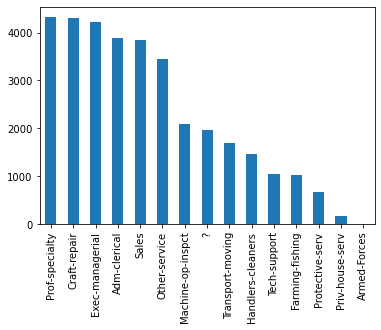

In [419]:
df['occupation'].value_counts().plot(kind="bar")
plt.show()

Pojawiają się braki danych w postaci '?'.

In [420]:
df.loc[df.occupation == "?"].__len__()

1960

### relationship

In [421]:
df['relationship'].value_counts()

Husband           13834
Not-in-family      8812
Own-child          5272
Unmarried          3572
Wife               1638
Other-relative     1061
Name: relationship, dtype: int64

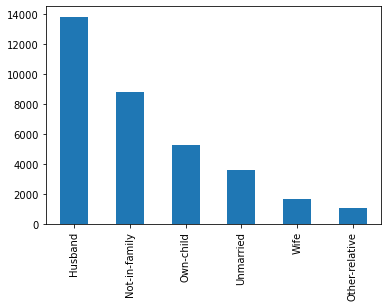

In [422]:
df['relationship'].value_counts().plot(kind="bar")
plt.show()

### race

In [423]:
df['race'].value_counts()

White                 29229
Black                  3271
Asian-Pac-Islander     1072
Amer-Indian-Eskimo      342
Other                   275
Name: race, dtype: int64

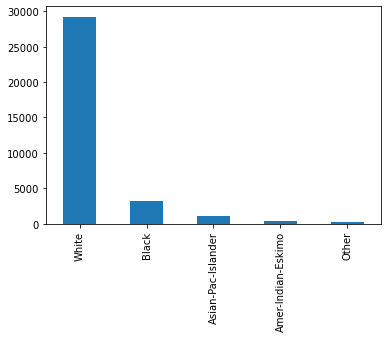

In [424]:
df['race'].value_counts().plot(kind="bar")
plt.show()

### sex

In [425]:
df['sex'].value_counts()

Male      22851
Female    11338
Name: sex, dtype: int64

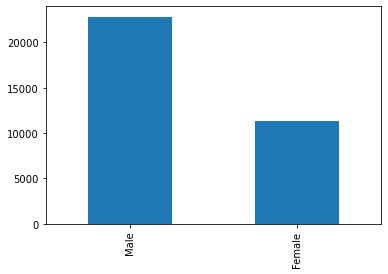

In [426]:
df['sex'].value_counts().plot(kind="bar")
plt.show()

### capital_gain

In [427]:
df['capital_gain'].value_counts()

0.0        31357
15024.0      356
7688.0       284
7298.0       260
99999.0      179
           ...  
6097.0         1
22040.0        1
7262.0         1
7978.0         1
1111.0         1
Name: capital_gain, Length: 119, dtype: int64

In [428]:
df['capital_gain'].value_counts().size

119

In [429]:
df['capital_gain'].describe()

count    34189.000000
mean      1101.266226
std       7601.004015
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

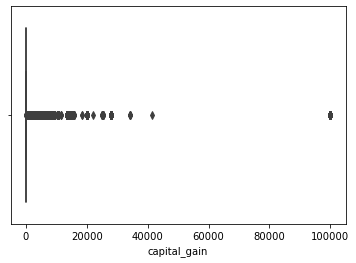

In [430]:
sns.boxplot(df['capital_gain'])
plt.show()

In [431]:
IQR = 0 - 0
print(0 - IQR * 1.5)
print(0 + IQR * 1.5)

0.0
0.0


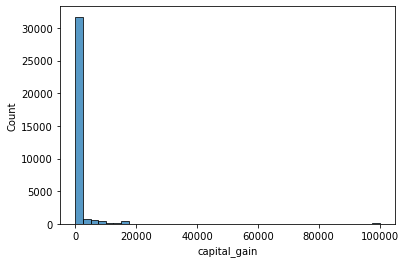

In [432]:
sns.histplot(df['capital_gain'], bins = 40)
plt.show()

Zdecydowana większość wartości mieści się w przedziale od zera do 20 tysięcy. Jest jednak jedna wysoka wartość z prawej strony. Sprawdźmy czy to pojedynczy przypadek i czy mamy dużo takich ogromnych wartości.

In [433]:
df.loc[df.capital_gain > 20000].__len__()

268

In [434]:
df.loc[df.capital_gain < 20000].__len__()

33921

In [435]:
df.loc[df.capital_gain > 0].__len__()

2832

In [436]:
df.loc[df.capital_gain == 0].__len__()

31357

Tak naprawdę niewiele wartości jest większych od zera.

In [437]:
df.loc[df.capital_gain > 42000].__len__()

179

In [438]:
df.loc[df.capital_gain == 99999].__len__()

179

Wszystkie wartości przyjmujące wartości powyżej 42 tysięcy, przyjmują wartość równą 99999. Oznacza to, że zmienna została prawdopodobnie sczapeczkowana.

### capital_loss

In [439]:
df['capital_loss'].value_counts()

0.0       32625
1902.0      207
1977.0      175
1887.0      156
2415.0       54
          ...  
2201.0        1
2080.0        1
4356.0        1
3175.0        1
1421.0        1
Name: capital_loss, Length: 96, dtype: int64

In [440]:
df['capital_loss'].value_counts().size

96

In [441]:
df['capital_loss'].describe()

count    34189.000000
mean        86.045833
std        400.627974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

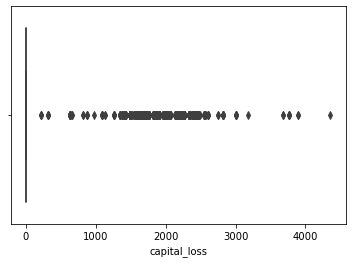

In [442]:
sns.boxplot(df['capital_loss'])
plt.show()

In [443]:
IQR = 0 - 0
print(0 - IQR * 1.5)
print(0 + IQR * 1.5)

0.0
0.0


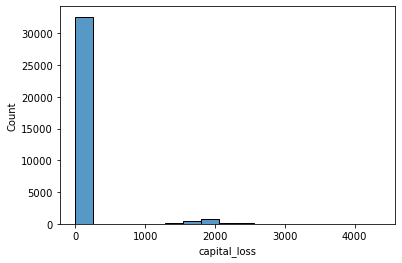

In [444]:
sns.histplot(df['capital_loss'])
plt.show()

Tutaj mamy w miarę 'normalne' wartości, bez skrajności. Raczej nie widać outlierów. Albo ktoś ma 'capitol_loss' równy zero, albo jest to w miarę normalna liczba.

### hours_per_week

In [445]:
df['hours_per_week'].value_counts()

40.0    15878
50.0     2968
45.0     1905
60.0     1523
35.0     1381
        ...  
74.0        2
87.0        1
79.0        1
82.0        1
97.0        1
Name: hours_per_week, Length: 94, dtype: int64

In [446]:
df['hours_per_week'].value_counts().size

94

In [447]:
df['hours_per_week'].describe()

count    34189.000000
mean        40.430138
std         12.412465
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

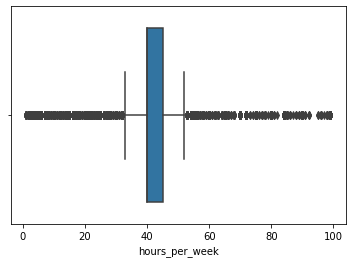

In [448]:
sns.boxplot(df['hours_per_week'])
plt.show()

In [449]:
IQR = 45 - 40
print(40 - IQR * 1.5)
print(45 + IQR * 1.5)

32.5
52.5


In [450]:
(df['hours_per_week']<32.5).sum()

5795

In [451]:
(df['hours_per_week']>52.5).sum()

3652

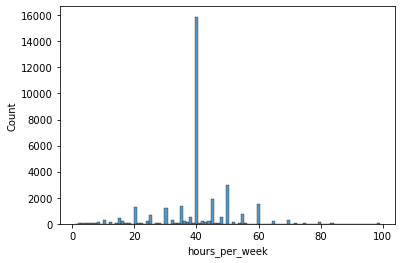

In [452]:
sns.histplot(df['hours_per_week'], bins = 99)
plt.show()

Większość osób pracuje 40 godzin (pełen etat). Nikt nie pracuje poniżej jednej godziny. Sprawdźmy czy zmienna została sczapeczkowana.

In [453]:
df.loc[df.hours_per_week == 99].__len__()

92

Bardzo możliwe, że została. Nie ma to jednak większego wpływu.

### native_country

In [454]:
df['native_country'].value_counts()

United-States                 30730
Mexico                          646
?                               610
Philippines                     205
Germany                         146
Puerto-Rico                     136
Canada                          116
India                           105
El-Salvador                     104
England                          93
Cuba                             91
China                            82
Italy                            76
South                            75
Dominican-Republic               75
Jamaica                          70
Japan                            70
Poland                           60
Vietnam                          60
Columbia                         57
Guatemala                        53
Haiti                            51
Taiwan                           48
Portugal                         43
Greece                           37
Nicaragua                        36
Iran                             33
Peru                        

In [455]:
df['native_country'].value_counts().size

42

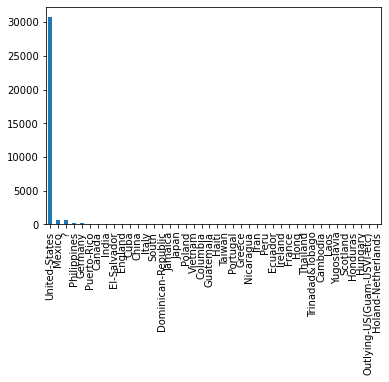

In [456]:
df['native_country'].value_counts().plot(kind="bar")
plt.show()

Pojawiaja się braki danych w postaci '?'. Ile ich jest?

In [457]:
df.loc[df.native_country == '?'].__len__()

610

### income_level

In [458]:
df['income_level'].value_counts()

<=50K    26018
>50K      8171
Name: income_level, dtype: int64

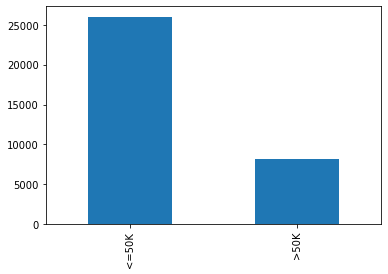

In [459]:
df['income_level'].value_counts().plot(kind="bar")
plt.show()

Jest to nasza zmienna celu.

## Analiza wielowymiarowa

Zacznijmy od tego co rzuciło się w oczy, zmienne capital_loss i capital_gain zawierały bardzo dużo zerowych wartości

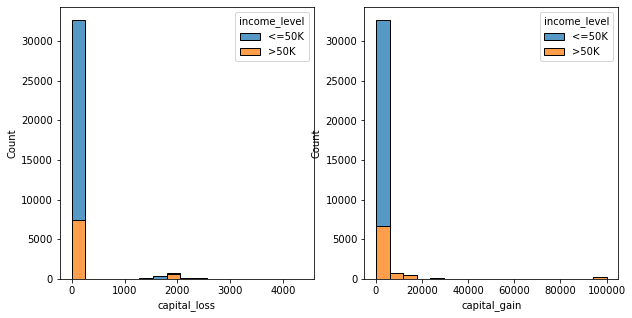

In [460]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize= (10,5))

sns.histplot(df, x='capital_loss', hue='income_level', multiple='stack', ax=axs[0])
sns.histplot(df, x='capital_gain', hue='income_level', multiple='stack', ax=axs[1])
plt.show()

In [461]:
df.loc[(df.capital_loss == 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_loss == 0) & (df.income_level=='>50K')].__len__()

3.415347137637028

In [462]:
df.loc[(df.capital_gain == 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_gain == 0) & (df.income_level=='>50K')].__len__()

3.8888369192391643

In [463]:
df.loc[(df.capital_loss > 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_loss > 0) & (df.income_level=='>50K')].__len__()

1.0

In [464]:
df.loc[(df.capital_gain > 0) & (df.income_level=='<=50K')].__len__()/df.loc[(df.capital_gain > 0) & (df.income_level=='>50K')].__len__()

0.6118383608423449

In [465]:
df.loc[df.income_level=='<=50K'].__len__()/df.loc[df.income_level=='>50K'].__len__()
#proporcje, kto ile zarabia biorąc wszystkie rekordy z próbki

3.184187981887162

Wygląda na to, że mogą jednak wpłynąć na predykcję. Wartości większych od 0 jest na tyle mało, że możemy zdyskretyzować na wartości równe 0 i wartości większe od 0.

Przejdzmy do wykresu korelacji. Skorzystałem z metody V Cramera do liczenia korelacji cech (kod znalazłem tutaj: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). Co prawda nie wszystkie zmienne są kategorczyne - zapuścimy algorytm raz jeszcze po zmianie zmiennych ciągłych na kategoryczne.

In [466]:
import scipy.stats as ss
def cramers_v2(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [467]:
A = [[0 for x in range(15)] for x in range(15)]

In [468]:
for i in range(15):
    for j in range(i+1,15):
        A[i][j]= cramers_v2(df.iloc[:,i], df.iloc[:,j])

<AxesSubplot:>

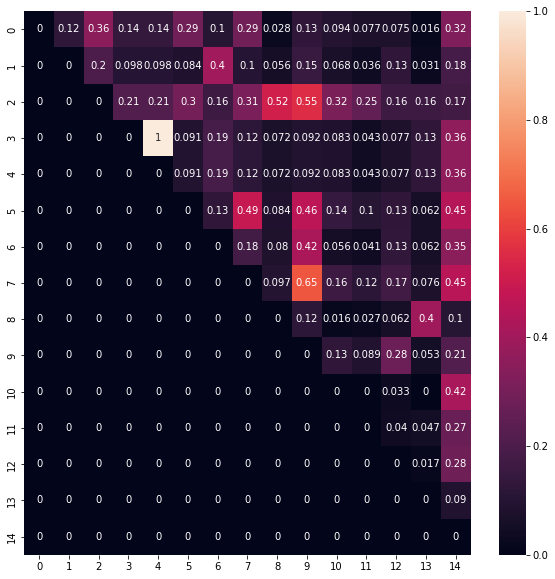

In [469]:
plt.figure(figsize = (10,10))
sns.heatmap(A, annot=True)

In [470]:
for i in range(15):
  print(i, df.columns[i])

0 age
1 workclass
2 fnlwgt
3 education
4 education_num
5 marital_status
6 occupation
7 relationship
8 race
9 sex
10 capital_gain
11 capital_loss
12 hours_per_week
13 native_country
14 income_level


Zauważamy kilka silniejszych korelacji i jedną maksymalną.

In [471]:
print(df.columns[3], df.columns[4])

education education_num


In [472]:
df.nunique()

age                  73
workclass             9
fnlwgt            22408
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         96
hours_per_week       94
native_country       42
income_level          2
dtype: int64

Obydwie kolumny mają taką samą ilość unikalnych wartości. Zapewne oznaczają to samo tylko jedna zawiera watości liczbowe, a druga stringi. Jeśli rzeczywiście tak jest możemy jedną z nich napewno wyrzucić.

In [473]:
print(df[['education','education_num']].drop_duplicates())

df[['education','education_num']].drop_duplicates().__len__()

          education  education_num
24423    Assoc-acdm             12
33032       Masters             14
18740       HS-grad              9
41130  Some-college             10
8650      Assoc-voc             11
35223     Bachelors             13
37681          10th              6
43500     Doctorate             16
34161   Prof-school             15
13742          11th              7
39232          12th              8
39090       7th-8th              4
34224           9th              5
6433      Preschool              1
48343       5th-6th              3
43805       1st-4th              2


16

Mamy 16 unikalnych par, są to dokładnie te same kolumny.
Teraz kolumny 9 i 7.

In [474]:
print(df.columns[7],df.columns[9])

relationship sex


In [475]:
df[['relationship','sex']].apply(pd.unique)

relationship    [Own-child, Not-in-family, Husband, Wife, Othe...
sex                                                [Male, Female]
dtype: object

<AxesSubplot:xlabel='relationship', ylabel='count'>

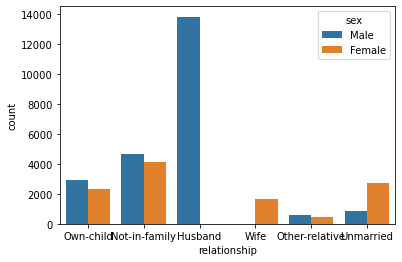

In [476]:
sns.countplot(data=df, x="relationship", hue="sex")

Wartości takie jak mąż i żona są oczywiście ściśle powiązane z płciami.

In [477]:
print(df.columns[2], df.columns[9])
print(df.columns[2], df.columns[8])

fnlwgt sex
fnlwgt race


<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

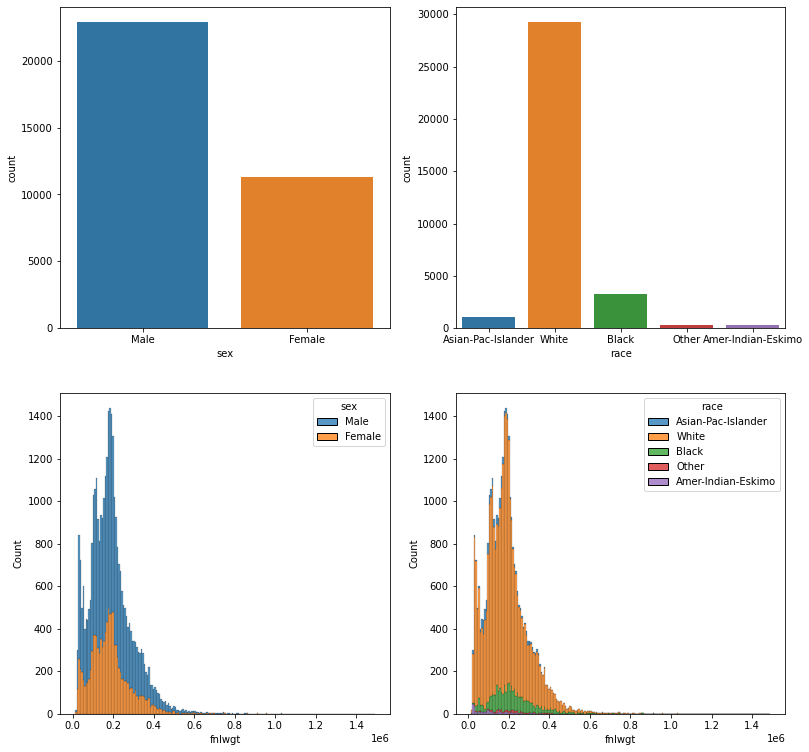

In [478]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize= (13,13))
sns.countplot(data=df, x="sex", ax = axs[0,0])
sns.countplot(data=df, x="race", ax=axs[0,1])

sns.histplot(df, x="fnlwgt", hue="sex", multiple='stack', ax=axs[1,0])
sns.histplot(df, x="fnlwgt", hue="race",multiple='stack', ax=axs[1,1])


Najbardziej powinny nas interesować korelacje z kolumną income_level. Mamy tam kilka większych.

<AxesSubplot:xlabel='income_level', ylabel='count'>

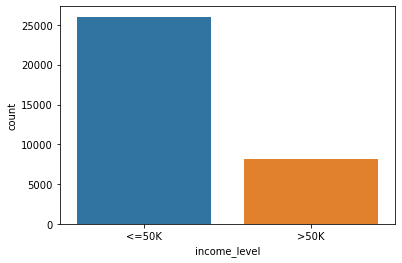

In [479]:
sns.countplot(data=df,x="income_level")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Assoc-acdm'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'HS-grad'),
  Text(3, 0, 'Some-college'),
  Text(4, 0, 'Assoc-voc'),
  Text(5, 0, 'Bachelors'),
  Text(6, 0, '10th'),
  Text(7, 0, 'Doctorate'),
  Text(8, 0, 'Prof-school'),
  Text(9, 0, '11th'),
  Text(10, 0, '12th'),
  Text(11, 0, '7th-8th'),
  Text(12, 0, '9th'),
  Text(13, 0, 'Preschool'),
  Text(14, 0, '5th-6th'),
  Text(15, 0, '1st-4th')])

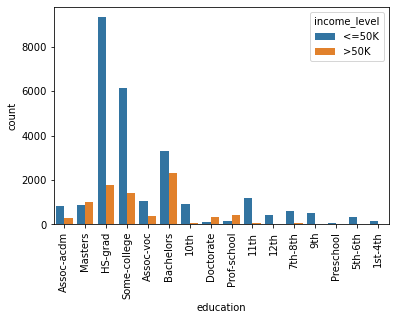

In [480]:
#fig, axs = plt.subplots(nrows=2,ncols=2, figsize= (13,13))
sns.countplot(data=df, x="education", hue="income_level")#, ax=axs[0,0])
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Divorced'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Never-married'),
  Text(3, 0, 'Widowed'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

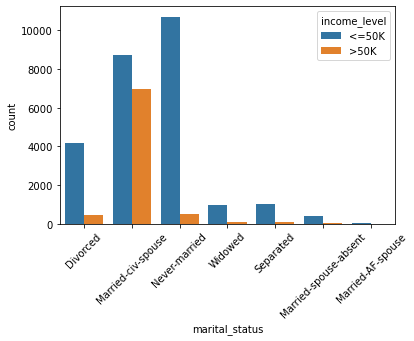

In [481]:
sns.countplot(data=df, x="marital_status", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Prof-specialty'),
  Text(2, 0, 'Farming-fishing'),
  Text(3, 0, 'Machine-op-inspct'),
  Text(4, 0, '?'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Other-service'),
  Text(9, 0, 'Transport-moving'),
  Text(10, 0, 'Handlers-cleaners'),
  Text(11, 0, 'Tech-support'),
  Text(12, 0, 'Priv-house-serv'),
  Text(13, 0, 'Protective-serv'),
  Text(14, 0, 'Armed-Forces')])

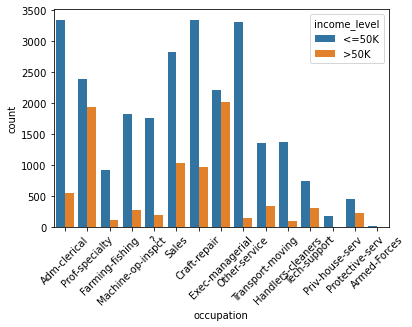

In [482]:
sns.countplot(data=df, x="occupation", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Own-child'),
  Text(1, 0, 'Not-in-family'),
  Text(2, 0, 'Husband'),
  Text(3, 0, 'Wife'),
  Text(4, 0, 'Other-relative'),
  Text(5, 0, 'Unmarried')])

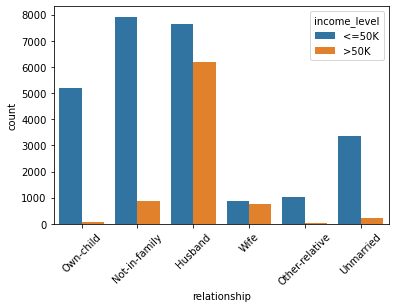

In [483]:
sns.countplot(data=df, x="relationship", hue="income_level")#, ax=axs[0,1])
plt.xticks(rotation=45)

Sprawdźmy jeszcze inne typy korelacje. Zacznijmy od korelacji zmiennych ciągłych - metodą Pearsona, Kendalla oraz Spearmana.

<function matplotlib.pyplot.show(close=None, block=None)>

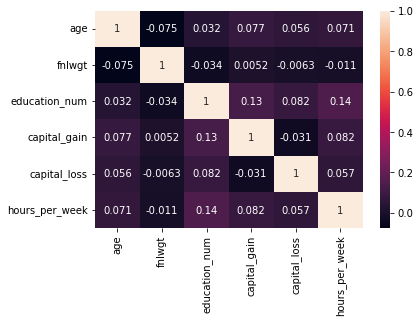

In [484]:
corr = df.corr(method = "pearson")
sns.heatmap(corr, annot= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

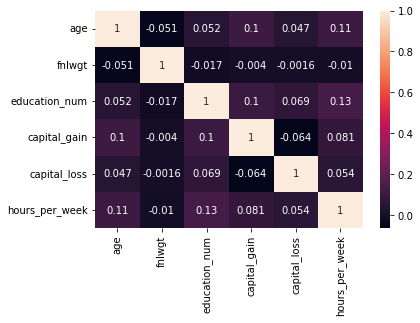

In [485]:
corr = df.corr(method = "kendall")
sns.heatmap(corr, annot= True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

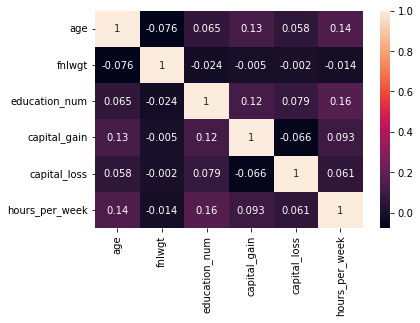

In [486]:
corr = df.corr(method = "spearman")
sns.heatmap(corr, annot= True)
plt.show

Nic ciekawego z nich nie wynika. I tak planujemy zamienić zmienne ciągłe na kategoryczne. Wcześniej użyliśmy metody Cramera V do zbadania korelacji zmiennych kategorycznych (mimo że nie wszystkie takie są). Istnieje jeszcze metoda Theils U, która jest jednak o wiele bardziej skomplikowana w implementacji. Można byłoby jeszcze policzyć korelację uniwersalną, działającą zarówno na zmiennych kategorycznych jak i zmiennych ciągłych w jednym zbiorze, zwaną "Correlation Ratio". Skoro jednak chcemy zaraz i tak zamienić sobie wszystkie zmienne ciągłe na kategoryczne, na razie sobie darujemy.

Na koniec użyjmy jeszcze pewnej biblioteki, służącej między innymi do liczenia korelacji między zmiennymi wszelakiego typu (zmienne nie muszą być tego samego typu).

In [487]:
!pip install dython
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

Czy biblioteka poprawnie wykryje zmienne kategoryczne?

In [488]:
categorical_features = identify_nominal_columns(df)
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income_level']

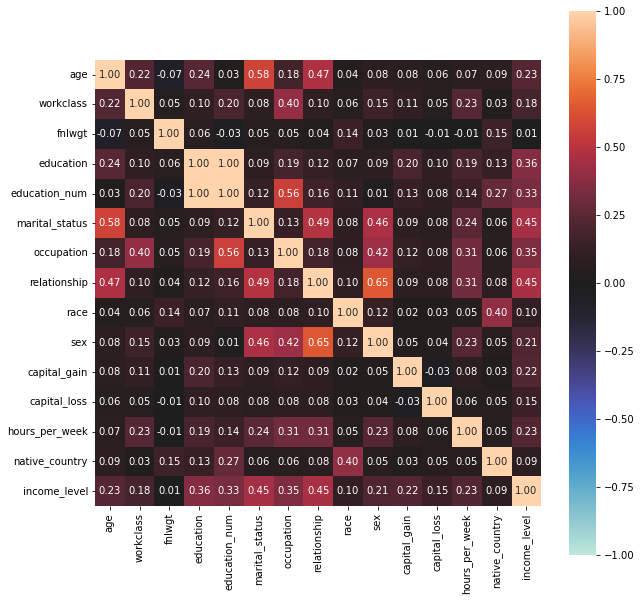

In [489]:
complete_correlation = associations(df, figsize=(10,10))

Funkcja z biblioteki automatycznie wykrywa typ zmiennych i używa korelacji Pearson'a R do obliczenia korelacji między zmienną ciągłą, a zmienną ciągłą, korelacji Cramer'a V (chyba domyślnie) lub Theil'a U do liczenia korelacji między zmienną kategoryczną, a kategoryczną oraz korelacji Correlation Ratio do liczenia korelacji między zmienną ciągłą, a zmienną kategoryczną.

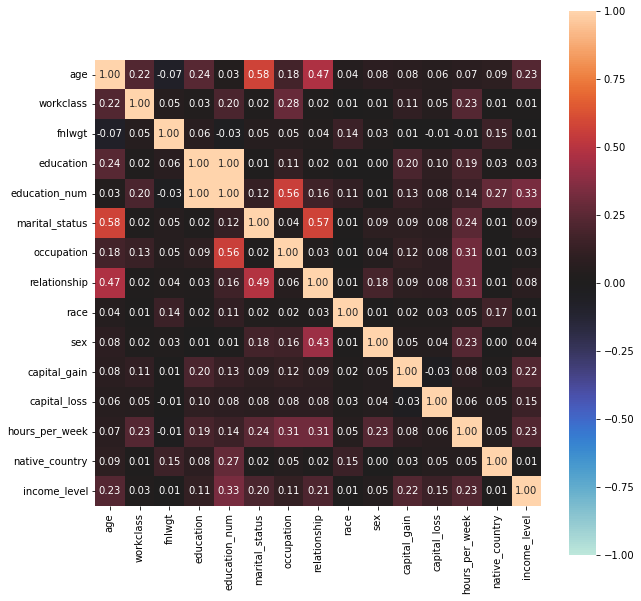

In [490]:
complete_correlation2 = associations(df, figsize=(10,10), nom_nom_assoc='theil')

Na górze policzyliśmy tak samo korelacje, tylko że do liczenia korelacji między zmienną kategoryczną, a drugą zmienną kategoryczną użyliśmy metody Theil'a U.

Możemy sobie również wyekstraktować policzone korelacje do macierzy.

In [491]:
df_complete_corr=complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,1.00,0.22,-0.07,0.24,0.03,0.58,0.18,0.47,0.04,0.08,0.08,0.06,0.07,0.09,0.23
workclass,0.22,1.00,0.05,0.10,0.20,0.08,0.40,0.10,0.06,0.15,0.11,0.05,0.23,0.03,0.18
fnlwgt,-0.07,0.05,1.00,0.06,-0.03,0.05,0.05,0.04,0.14,0.03,0.01,-0.01,-0.01,0.15,0.01
education,0.24,0.10,0.06,1.00,1.00,0.09,0.19,0.12,0.07,0.09,0.20,0.10,0.19,0.13,0.36
education_num,0.03,0.20,-0.03,1.00,1.00,0.12,0.56,0.16,0.11,0.01,0.13,0.08,0.14,0.27,0.33
marital_status,0.58,0.08,0.05,0.09,0.12,1.00,0.13,0.49,0.08,0.46,0.09,0.08,0.24,0.06,0.45
occupation,0.18,0.40,0.05,0.19,0.56,0.13,1.00,0.18,0.08,0.42,0.12,0.08,0.31,0.06,0.35
relationship,0.47,0.10,0.04,0.12,0.16,0.49,0.18,1.00,0.10,0.65,0.09,0.08,0.31,0.08,0.45
race,0.04,0.06,0.14,0.07,0.11,0.08,0.08,0.10,1.00,0.12,0.02,0.03,0.05,0.40,0.10
sex,0.08,0.15,0.03,0.09,0.01,0.46,0.42,0.65,0.12,1.00,0.05,0.04,0.23,0.05,0.21


Na razie mamy zmienne ciągłe i kategoryczne. Możemy użyć biblioteki do samych zmiennych kategorycznych.

In [492]:
selected_column= df[categorical_features]
categorical_df = selected_column.copy()

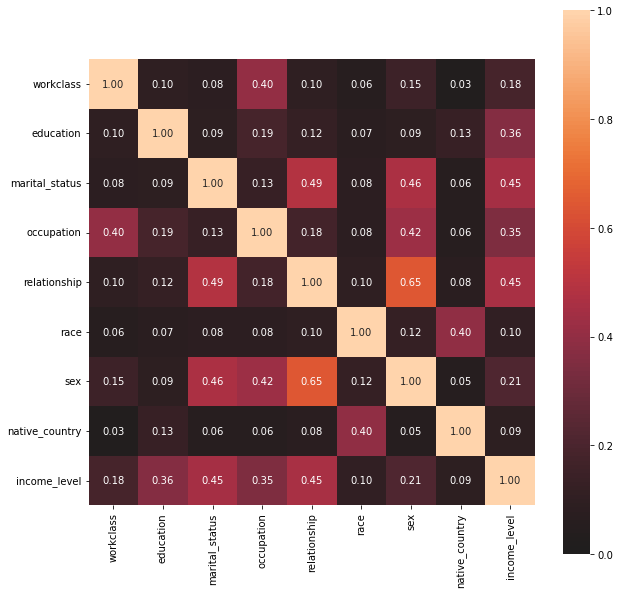

In [493]:
categorical_correlation= associations(categorical_df, figsize=(10,10))

In [494]:
df_categorical_corr=categorical_correlation['corr']
df_categorical_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income_level
workclass,1.00,0.10,0.08,0.40,0.10,0.06,0.15,0.03,0.18
education,0.10,1.00,0.09,0.19,0.12,0.07,0.09,0.13,0.36
marital_status,0.08,0.09,1.00,0.13,0.49,0.08,0.46,0.06,0.45
occupation,0.40,0.19,0.13,1.00,0.18,0.08,0.42,0.06,0.35
relationship,0.10,0.12,0.49,0.18,1.00,0.10,0.65,0.08,0.45
race,0.06,0.07,0.08,0.08,0.10,1.00,0.12,0.40,0.10
sex,0.15,0.09,0.46,0.42,0.65,0.12,1.00,0.05,0.21
native_country,0.03,0.13,0.06,0.06,0.08,0.40,0.05,1.00,0.09
income_level,0.18,0.36,0.45,0.35,0.45,0.10,0.21,0.09,1.00


## Porównanie danych do budowania z danymi testowymi przed preprocessingiem

Najpierw sprawdźmy, czy występują jakieś braki danych.

In [495]:
df_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [496]:
print(df_test.loc[df_test.workclass == "?"].__len__())
print(df_test.loc[df_test.occupation == "?"].__len__())
print(df_test.loc[df_test.native_country == "?"].__len__())

848
849
247


Występują w tych samych zmiennych i w tej samej postaci - znakach zapytania.

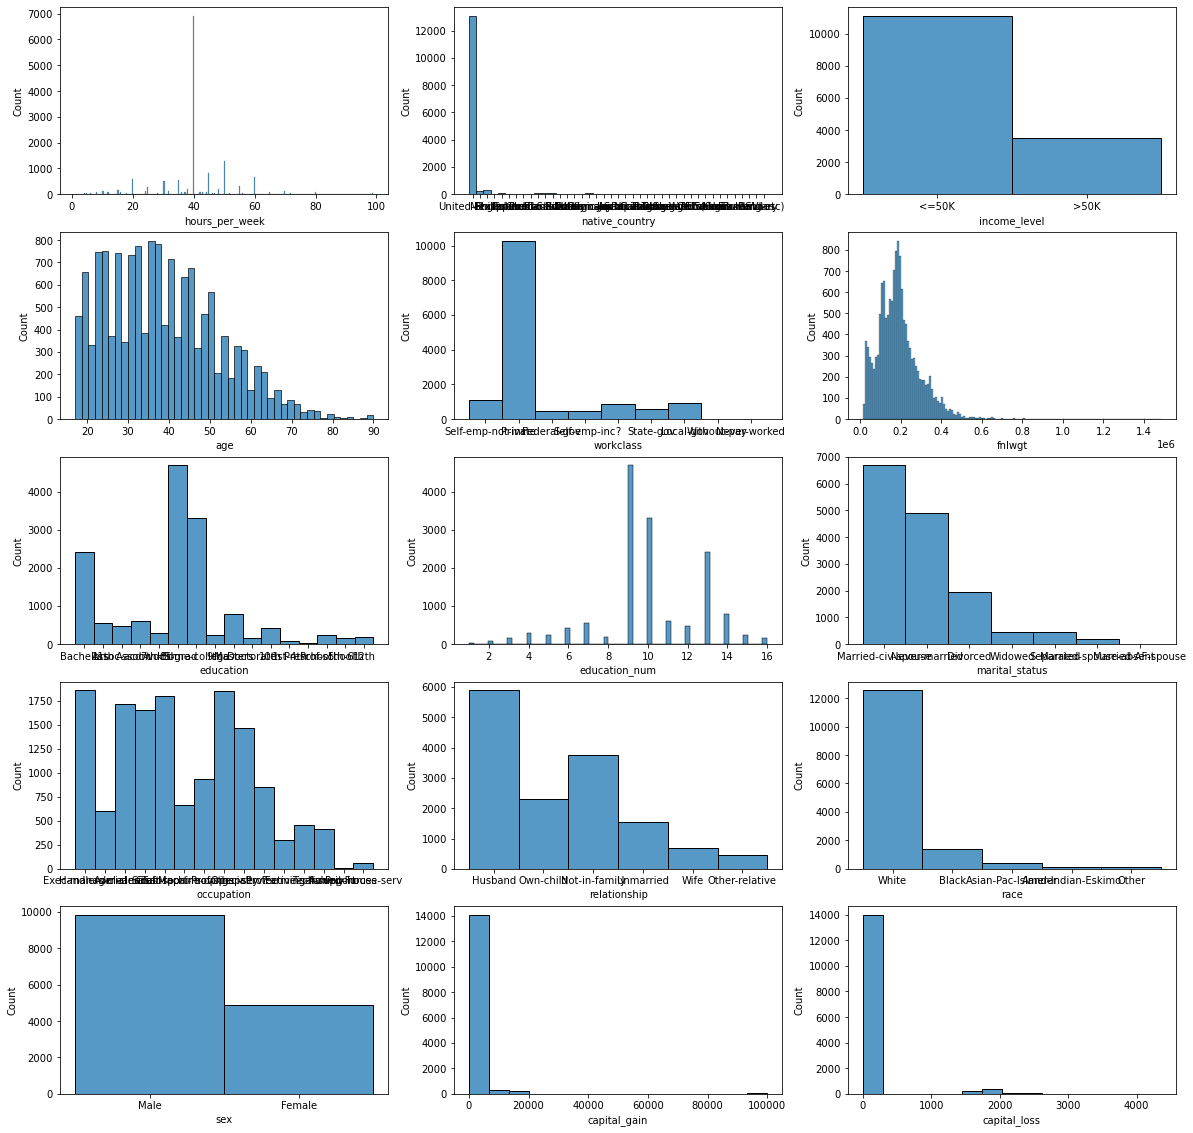

In [497]:
fig, axs = plt.subplots(nrows=5,ncols=3, figsize= (20,20))
for i in range(5):
    for j in range(3):
        sns.histplot(df_test, x=test.columns[(i-1)*3 + j], ax=axs[i,j])

Rozkłady na pierwszy rzut oka wyglądają całkiem podobnie.

In [498]:
df_test.loc[df_test.capital_gain == 99999].__len__()

65

Zmienna 'capital_gain' i tutaj być może sczapeczkowana.

<AxesSubplot:>

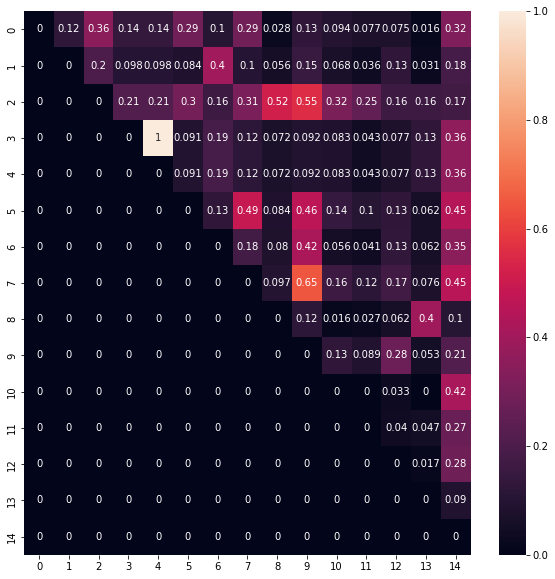

In [499]:
A = [[0 for x in range(15)] for x in range(15)]
for i in range(15):
    for j in range(i+1,15):
        A[i][j]= cramers_v2(df.iloc[:,i], df.iloc[:,j])
plt.figure(figsize = (10,10))
sns.heatmap(A, annot=True)

<AxesSubplot:>

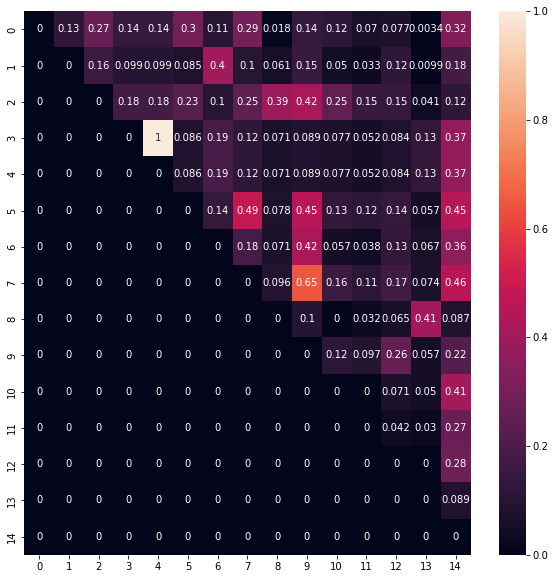

In [500]:
A = [[0 for x in range(15)] for x in range(15)]
for i in range(15):
    for j in range(i+1,15):
        A[i][j]= cramers_v2(test.iloc[:,i], test.iloc[:,j])
plt.figure(figsize = (10,10))
sns.heatmap(A, annot=True)

Korelacje również wyglądają niemal identycznie. Sprawdźmy jeszcze korelacje przy użyciu biblioteki.

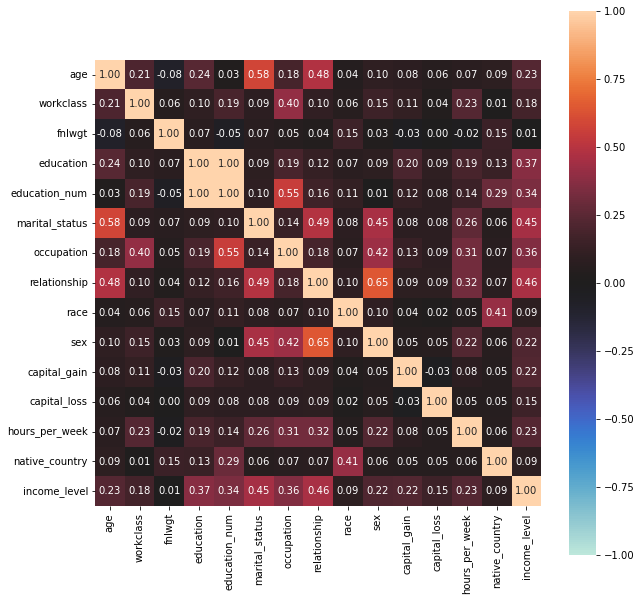

In [501]:
complete_correlation_test = associations(df_test, figsize=(10,10))

Tutaj również wyglądają niemal identycznie. Możemy zrobić również i w tym przypadku z nich macierz i odjąć ją od macierzy otrzymanej na zbiorze do budowy.

In [502]:
df_complete_corr_test = complete_correlation_test['corr']
df_complete_corr_test.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,1.00,0.21,-0.08,0.24,0.03,0.58,0.18,0.48,0.04,0.10,0.08,0.06,0.07,0.09,0.23
workclass,0.21,1.00,0.06,0.10,0.19,0.09,0.40,0.10,0.06,0.15,0.11,0.04,0.23,0.01,0.18
fnlwgt,-0.08,0.06,1.00,0.07,-0.05,0.07,0.05,0.04,0.15,0.03,-0.03,0.00,-0.02,0.15,0.01
education,0.24,0.10,0.07,1.00,1.00,0.09,0.19,0.12,0.07,0.09,0.20,0.09,0.19,0.13,0.37
education_num,0.03,0.19,-0.05,1.00,1.00,0.10,0.55,0.16,0.11,0.01,0.12,0.08,0.14,0.29,0.34
marital_status,0.58,0.09,0.07,0.09,0.10,1.00,0.14,0.49,0.08,0.45,0.08,0.08,0.26,0.06,0.45
occupation,0.18,0.40,0.05,0.19,0.55,0.14,1.00,0.18,0.07,0.42,0.13,0.09,0.31,0.07,0.36
relationship,0.48,0.10,0.04,0.12,0.16,0.49,0.18,1.00,0.10,0.65,0.09,0.09,0.32,0.07,0.46
race,0.04,0.06,0.15,0.07,0.11,0.08,0.07,0.10,1.00,0.10,0.04,0.02,0.05,0.41,0.09
sex,0.10,0.15,0.03,0.09,0.01,0.45,0.42,0.65,0.10,1.00,0.05,0.05,0.22,0.06,0.22


In [503]:
x = df_complete_corr - df_complete_corr_test
x.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
age,0.00,0.01,0.01,0.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00
workclass,0.01,0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,0.00,-0.00,0.02,0.00,0.02,0.00
fnlwgt,0.01,-0.01,0.00,-0.01,0.02,-0.02,-0.01,-0.00,-0.01,-0.00,0.03,-0.01,0.01,0.00,-0.00
education,0.00,-0.00,-0.01,0.00,0.00,0.01,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.01,-0.01
education_num,0.00,0.01,0.02,0.00,0.00,0.02,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,-0.02,-0.01
marital_status,-0.01,-0.00,-0.02,0.01,0.02,0.00,-0.01,0.00,0.01,0.01,0.01,-0.01,-0.02,0.00,-0.00
occupation,-0.00,-0.00,-0.01,-0.00,0.01,-0.01,0.00,-0.01,0.01,0.00,-0.01,-0.00,-0.01,-0.01,-0.01
relationship,-0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.01,0.00,0.00,0.00,0.00,-0.01,-0.01,0.00,-0.00
race,-0.00,-0.01,-0.01,0.00,-0.00,0.01,0.01,0.00,0.00,0.02,-0.01,0.01,-0.00,-0.01,0.02
sex,-0.01,0.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,-0.00,-0.01,0.01,-0.00,-0.00


Niemalże identyczne.

## Braki danych

Wstępna analiza pokazała nam braki danych w trzech miejscach:
1. zmienna 'workclass' zawiera znaki zapytania,
2. zmienna 'occupation' zawiera znaki zapytania,
3. zmienna 'native_country' zawiera znaki zapytania.

Rozprawmy się z nimi po kolei.

### workclass

Przypomnijmy ile ich jest.

In [504]:
df.loc[df.workclass == "?"].__len__()

1951

Jest to stosunkowo dużo kolumn. Nie ma sensu usuwać je wszystkie. Zobaczmy ich rozkład.

In [505]:
df['workclass'].describe()

count       34189
unique          9
top       Private
freq        23621
Name: workclass, dtype: object

In [506]:
df['workclass'].value_counts()

Private             23621
Self-emp-not-inc     2748
Local-gov            2237
?                    1951
State-gov            1419
Self-emp-inc         1201
Federal-gov           987
Without-pay            16
Never-worked            9
Name: workclass, dtype: int64

Zastąpmy na razie wszystkie braki danych najczęściej występującą wartością, "Private".

In [507]:
df_fixed = df.copy()
# df_fixed
df_fixed.loc[df_fixed["workclass"] == "?", "workclass"] = "Private"
df_fixed['workclass'].value_counts()

Private             25572
Self-emp-not-inc     2748
Local-gov            2237
State-gov            1419
Self-emp-inc         1201
Federal-gov           987
Without-pay            16
Never-worked            9
Name: workclass, dtype: int64

In [508]:
df['workclass'].value_counts()

Private             23621
Self-emp-not-inc     2748
Local-gov            2237
?                    1951
State-gov            1419
Self-emp-inc         1201
Federal-gov           987
Without-pay            16
Never-worked            9
Name: workclass, dtype: int64

### occupation

Ile ich jest?

In [509]:
df_fixed.loc[df_fixed.occupation == "?"].__len__()

1960

In [510]:
df_fixed['occupation'].describe()

count              34189
unique                15
top       Prof-specialty
freq                4325
Name: occupation, dtype: object

In [511]:
df_fixed['occupation'].value_counts()

Prof-specialty       4325
Craft-repair         4307
Exec-managerial      4228
Adm-clerical         3890
Sales                3852
Other-service        3453
Machine-op-inspct    2088
?                    1960
Transport-moving     1685
Handlers-cleaners    1468
Tech-support         1035
Farming-fishing      1033
Protective-serv       678
Priv-house-serv       177
Armed-Forces           10
Name: occupation, dtype: int64

Nie ma jednej przeważającej wartości. Są one dość ładnie rozłożone. Spróbujmy więc może innego podejścia. Zastąpmy braki danych w postaci znaków zapytania według częstości występowania poszczególnych wartości.

In [512]:
s = df_fixed.occupation.value_counts(normalize = True)
df_fixed.loc[df_fixed.occupation == "?", 'occupation'] = np.random.choice(s.index, p=s.values, size=df_fixed.loc[df_fixed.occupation == "?"].__len__())
df_fixed['occupation'].value_counts()

Prof-specialty       4577
Craft-repair         4569
Exec-managerial      4467
Adm-clerical         4112
Sales                4069
Other-service        3660
Machine-op-inspct    2207
Transport-moving     1769
Handlers-cleaners    1546
Tech-support         1105
Farming-fishing      1098
Protective-serv       709
Priv-house-serv       188
?                     103
Armed-Forces           10
Name: occupation, dtype: int64

### native_country

Zliczmy je.

In [513]:
df_fixed.loc[df_fixed.native_country == '?'].__len__()

610

In [514]:
df_fixed['native_country'].describe()

count             34189
unique               42
top       United-States
freq              30730
Name: native_country, dtype: object

In [515]:
df_fixed['native_country'].value_counts()

United-States                 30730
Mexico                          646
?                               610
Philippines                     205
Germany                         146
Puerto-Rico                     136
Canada                          116
India                           105
El-Salvador                     104
England                          93
Cuba                             91
China                            82
Italy                            76
South                            75
Dominican-Republic               75
Jamaica                          70
Japan                            70
Poland                           60
Vietnam                          60
Columbia                         57
Guatemala                        53
Haiti                            51
Taiwan                           48
Portugal                         43
Greece                           37
Nicaragua                        36
Iran                             33
Peru                        

Ponownie zastąpienie braków danych zdecydowanie najpopularniejszą wartością - 'United-State' wydaje się być dobrym pomysłem. Zróbmy to.

In [516]:
df_fixed.loc[df_fixed["native_country"] == "?", "native_country"] = "United-States"
df_fixed["native_country"].value_counts()

United-States                 31340
Mexico                          646
Philippines                     205
Germany                         146
Puerto-Rico                     136
Canada                          116
India                           105
El-Salvador                     104
England                          93
Cuba                             91
China                            82
Italy                            76
South                            75
Dominican-Republic               75
Japan                            70
Jamaica                          70
Vietnam                          60
Poland                           60
Columbia                         57
Guatemala                        53
Haiti                            51
Taiwan                           48
Portugal                         43
Greece                           37
Nicaragua                        36
Iran                             33
Peru                             33
Ecuador                     

## Dalszy preprocessing

W tym rozdziale można wyrzucić te niepotrzebne kolumny, coś tam ogarnac te czapeczki czy coś. Kolejny rozdiały to już zamiana ciągłych na kategoryczne a potem encoding.